## Analisis de incendios en California, Fuente California Department of Forestry and Fire Protection 
Ramo Minería de datos

In [12]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [13]:
# Importación de datos
incendios = pd.read_csv("https://raw.githubusercontent.com/Kiki1108/incendios/refs/heads/main/data/california.csv")
incendios.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,Shape__Area,Shape__Length
0,1,2023.0,CA,CDF,SKU,WHITWORTH,00004808,2023/06/17 00:00:00+00,2023/06/17 00:00:00+00,5.0,...,1.0,5.729125,NaN,NaN,{7985848C-0AC2-4BA4-8F0E-29F778652E61},NaN,NaN,2020.0,41407.839844,1247.166034
1,2,2023.0,CA,LRA,BTU,KAISER,00010225,2023/06/02 00:00:00+00,2023/06/02 00:00:00+00,5.0,...,1.0,13.602380,NaN,NaN,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},NaN,NaN,2020.0,93455.878906,1285.514550
2,3,2023.0,CA,CDF,AEU,JACKSON,00017640,2023/07/01 00:00:00+00,2023/07/02 00:00:00+00,2.0,...,1.0,27.814460,NaN,NaN,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},NaN,NaN,2020.0,183028.500000,2697.587429
3,4,2023.0,CA,CDF,AEU,CARBON,00018821,2023/07/11 00:00:00+00,2023/07/11 00:00:00+00,9.0,...,1.0,58.760230,NaN,NaN,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},NaN,NaN,2020.0,388221.953125,2548.738779
4,5,2023.0,CA,CDF,AEU,LIBERTY,00018876,2023/07/11 00:00:00+00,2023/07/12 00:00:00+00,14.0,...,1.0,70.979000,NaN,NaN,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},NaN,NaN,2020.0,466456.007812,5106.936526


### ¿Qué significa cada una de las columnas?

<ul>
    <li><strong>OBJECTID</strong> → Identificador único asignado automáticamente a cada registro dentro de una base de datos geoespacial.</li>
    <li><strong>YEAR_</strong> → Año en que ocurrió el incendio.</li>
    <li><strong>STATE</strong> → Estado de EE.UU. donde ocurrió el incendio (en este caso, generalmente es “CA”).</li>
    <li><strong>AGENCY</strong> → Agencia responsable de responder o registrar el incendio.</li>
    <li><strong>UNIT_ID</strong> → Identificador de la unidad local o regional de la agencia que respondió al incendio.</li>
    <li><strong>FIRE_NAME</strong> → Nombre oficial del incendio.</li>
    <li><strong>INC_NUM</strong> → Número de incidente asignado por la agencia correspondiente.</li>
    <li><strong>ALARM_DATE</strong> → Fecha en la que se detectó o reportó el incendio por primera vez.</li>
    <li><strong>CONT_DATE</strong> → Fecha en la que se declaró el incendio como contenido (es decir, bajo control).</li>
    <li><strong>CAUSE</strong> → Causa del incendio (estan descritas por un numero que significan algun suceso).</li>
    <li><strong>OBJECTIVE</strong> → Objetivo de manejo del incendio.</li>
    <li><strong>GIS_ACRES</strong> → Superficie quemada del incendio en acres, calculada mediante información geoespacial.</li>
    <li><strong>COMMENTS</strong> → Comentarios adicionales sobre el incidente.</li>
    <li><strong>COMPLEX_NAME</strong> → Nombre del complejo si el incendio fue parte de un grupo de incendios manejados como uno solo.</li>
    <li><strong>IRWINID</strong> → Identificador único del incidente dentro del sistema nacional IRWIN (Integrated Reporting of Wildland-Fire Information).</li>
    <li><strong>FIRE_NUM</strong> → Número secuencial asignado al incendio dentro de su jurisdicción o agencia en ese año.</li>
    <li><strong>COMPLEX_ID</strong> → Identificador del complejo al que pertenece el incendio si aplica.</li>
    <li><strong>DECADES</strong> → Década en la que ocurrió el incendio (por ejemplo, 1990s, 2000s).</li>
    <li><strong>Shape__Area</strong> → Área geoespacial del polígono que representa el incendio, en unidades del sistema geográfico usado (generalmente metros cuadrados).</li>
    <li><strong>Shape__Length</strong> → Longitud del perímetro del incendio en el sistema geoespacial utilizado.</li>
</ul>



## Analisis del estado / calidad de los datos

In [14]:
# Analisis de missing values
incendios.isna().sum()

OBJECTID             0
YEAR_               77
STATE                0
AGENCY              53
UNIT_ID             66
FIRE_NAME          172
INC_NUM            971
ALARM_DATE        5396
CONT_DATE        12629
CAUSE               24
C_METHOD         12121
OBJECTIVE          247
GIS_ACRES            0
COMMENTS         18278
COMPLEX_NAME     21659
IRWINID          19565
FIRE_NUM          5060
COMPLEX_ID       21901
DECADES             77
Shape__Area          0
Shape__Length        0
dtype: int64

In [15]:
# Revisión de duplicados
print(incendios.duplicated().sum())

0


In [16]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
incendios.describe()

,OBJECTID,YEAR_,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,DECADES,Shape__Area,Shape__Length
count,22261.000000,22184.000000,22237.000000,10140.000000,22014.000000,2.226100e+04,22184.000000,2.226100e+04,2.226100e+04
mean,11131.000000,1977.728814,9.262760,4.382544,1.012810,1.937376e+03,1973.185179,1.255412e+07,1.155916e+04
std,6426.341507,33.604150,5.162862,3.078567,0.112457,1.470174e+04,33.828122,9.898280e+07,3.583127e+04
min,1.000000,1878.000000,1.000000,1.000000,1.000000,1.356887e-03,1800.000000,7.933594e+00,1.100426e+01
25%,5566.000000,1951.000000,4.000000,1.000000,1.000000,2.713978e+01,1950.000000,1.739005e+05,2.043461e+03
50%,11131.000000,1984.000000,10.000000,5.000000,1.000000,1.486008e+02,1980.000000,9.441777e+05,4.753036e+03
75%,16696.000000,2008.000000,14.000000,8.000000,1.000000,6.210093e+02,2000.000000,3.988346e+06,1.032376e+04
max,22261.000000,2023.000000,19.000000,8.000000,2.000000,1.032700e+06,2020.000000,7.116308e+09,2.010262e+06


In [17]:
# Revisión de tipos de datos
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22261 entries, 0 to 22260
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       22261 non-null  int64  
 1   YEAR_          22184 non-null  float64
 2   STATE          22261 non-null  object 
 3   AGENCY         22208 non-null  object 
 4   UNIT_ID        22195 non-null  object 
 5   FIRE_NAME      22089 non-null  object 
 6   INC_NUM        21290 non-null  object 
 7   ALARM_DATE     16865 non-null  object 
 8   CONT_DATE      9632 non-null   object 
 9   CAUSE          22237 non-null  float64
 10  C_METHOD       10140 non-null  float64
 11  OBJECTIVE      22014 non-null  float64
 12  GIS_ACRES      22261 non-null  float64
 13  COMMENTS       3983 non-null   object 
 14  COMPLEX_NAME   602 non-null    object 
 15  IRWINID        2696 non-null   object 
 16  FIRE_NUM       17201 non-null  object 
 17  COMPLEX_ID     360 non-null    object 
 18  DECADE

In [18]:
# Revisión de valores únicos por columna
cols = incendios.columns.tolist()
for col in cols:
    print(f"{col}: {incendios[col].unique()}")

OBJECTID: [    1     2     3 ... 22259 22260 22261]
YEAR_: [2023. 2022. 2021. 2020. 2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012.
 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000.
 1999. 1998. 1997. 1996. 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988.
 1987. 1986. 1985. 1984. 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976.
 1975. 1974. 1973. 1972. 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964.
 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952.
 1951. 1950. 1949. 1948. 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940.
 1939. 1938. 1937. 1936. 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928.
 1927. 1926. 1925. 1924. 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916.
 1915. 1914. 1913. 1912. 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1903.
 1902. 1900. 1898. 1896. 1895. 1878.   nan]
STATE: ['CA' 'OR' 'NV' 'AZ']
AGENCY: ['CDF' 'LRA' 'CCO' 'FWS' 'USF' 'NPS' 'BLM' 'BIA' 'DOD' nan 'OTH']
UNIT_ID: ['SKU' 'BTU' 'AEU' 'BEU' 'SHU' 'RRU' 'MEU' 'KRN' 'SBC' 

### Qué preguntantas nos podemos hacer??

<ul>
    <li>¿En qué mes hay más incencios?</li>
    <li>¿Cuál es la distribución con los incendios en fecha?</li>
    <li>¿Cuál es la distribución con los incendios por año?</li>
    <li>Area por mes</li>
    <li>Area por año</li>
    <li>CSV datos metereológicos</li>
</ul>

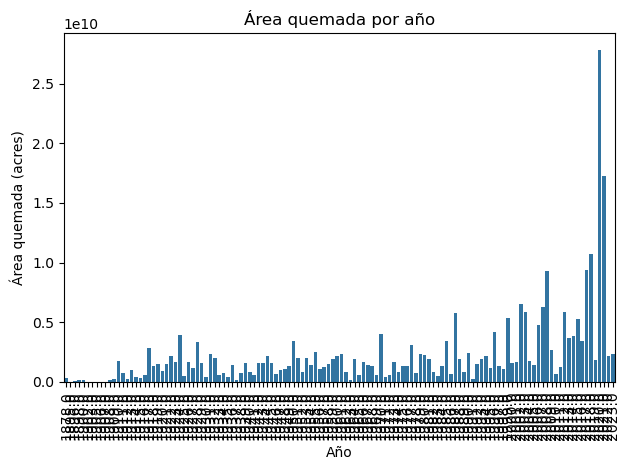

In [19]:
# Años con más incendios
area_anual = incendios.groupby("YEAR_")["Shape__Area"].sum()

area_anual_df = area_anual.reset_index()  # convierte Series a DataFrame

sns.barplot(data=area_anual_df, x="YEAR_", y="Shape__Area")

plt.title("Área quemada por año")
plt.xlabel("Año")
plt.ylabel("Área quemada (acres)")
plt.xticks(rotation=90)  # gira las etiquetas del eje x si hay muchos años
plt.tight_layout()
plt.show()


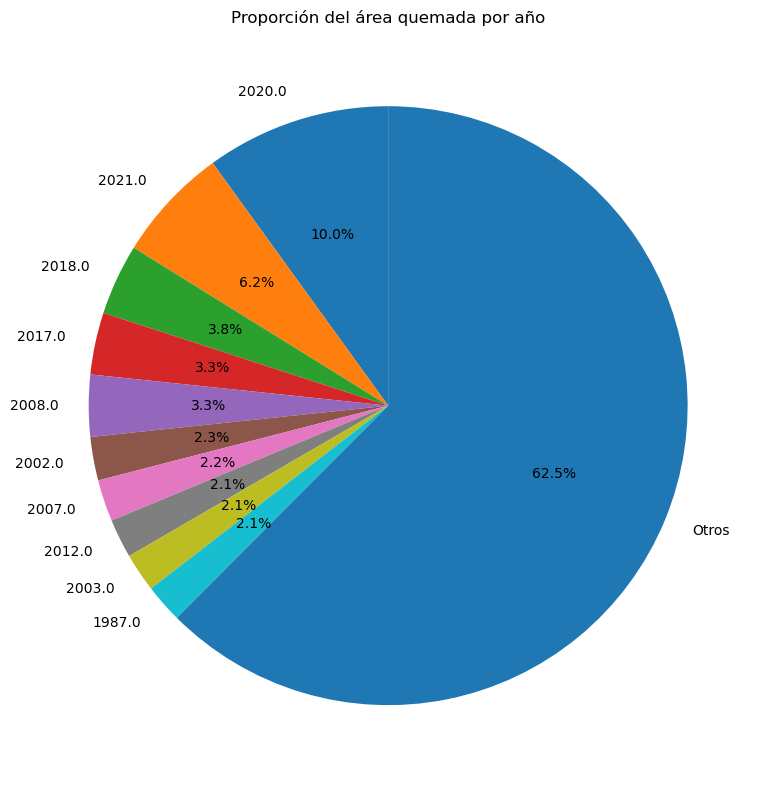

In [20]:
# Usamos los datos agrupados que ya tienes
area_anual = incendios.groupby("YEAR_")["Shape__Area"].sum()

# Ordenamos de mayor a menor para que se vea más claro
area_anual = area_anual.sort_values(ascending=False)

# Si hay demasiados años, mejor mostrar solo los más relevantes
top_n = 10
area_top = area_anual.head(top_n)
otros = area_anual.iloc[top_n:].sum()
area_top["Otros"] = otros  # agrupamos los años menores como "Otros"

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(area_top, labels=area_top.index, autopct="%1.1f%%", startangle=90)

plt.title("Proporción del área quemada por año")
plt.tight_layout()
plt.show()

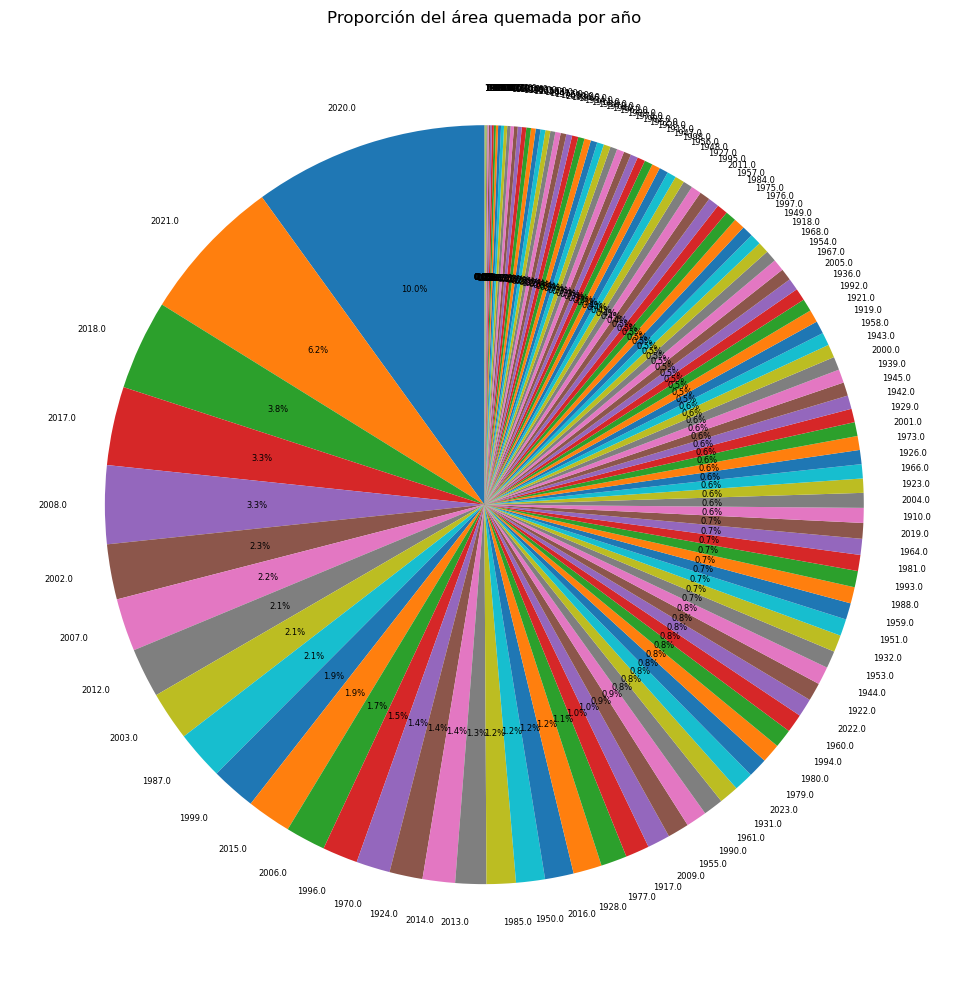

In [21]:
# Ordenamos de mayor a menor (opcional)
area_anual = area_anual.sort_values(ascending=False)

# Gráfico de torta
plt.figure(figsize=(10, 10))
plt.pie(
    area_anual,
    labels=area_anual.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={'fontsize': 6}  # Tamaño de letra más pequeño
)

plt.title("Proporción del área quemada por año", fontsize=12)
plt.tight_layout()
plt.show()

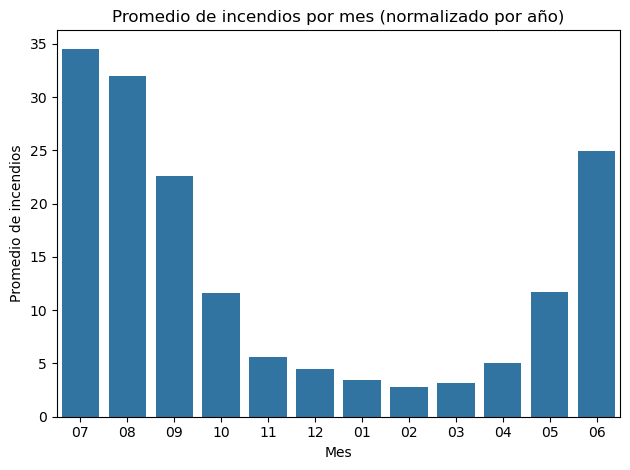

In [22]:
# Asegúrate de que las fechas estén bien
incendios["ALARM_DATE"] = pd.to_datetime(incendios["ALARM_DATE"])
incendios["mes_incendio"] = incendios["ALARM_DATE"].dt.strftime("%m")
incendios["anio"] = incendios["ALARM_DATE"].dt.year

# Contar cantidad de incendios por mes y año
conteo_por_mes_anio = incendios.groupby(["mes_incendio", "anio"]).size().reset_index(name="cantidad")

# Calcular el promedio por mes
promedio_incendios_mes = conteo_por_mes_anio.groupby("mes_incendio")["cantidad"].mean().reset_index()

# Ordenar los meses
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

# Gráfico
sns.barplot(data=promedio_incendios_mes, x="mes_incendio", y="cantidad", order=orden_meses)

plt.title("Promedio de incendios por mes (normalizado por año)")
plt.xlabel("Mes")
plt.ylabel("Promedio de incendios")
plt.tight_layout()
plt.show()


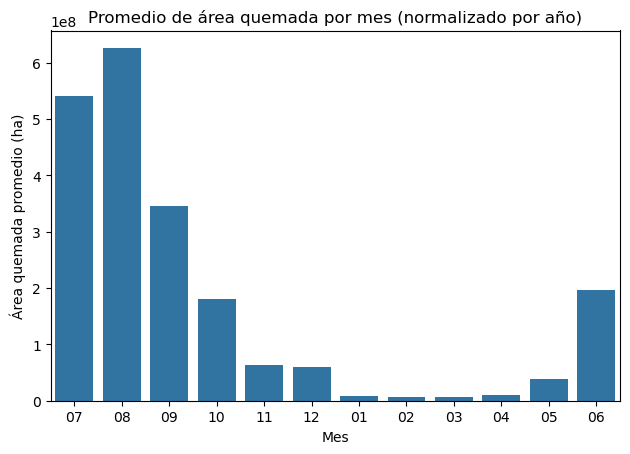

In [24]:
# Asegúrate que 'ALARM_DATE' está en datetime (ya lo tienes)
incendios["ALARM_DATE"] = pd.to_datetime(incendios["ALARM_DATE"])

# Extraer mes y año
incendios["mes_incendio"] = incendios["ALARM_DATE"].dt.strftime("%m")
incendios["anio"] = incendios["ALARM_DATE"].dt.year

# Crear tabla con área total por mes y año
area_por_mes_anio = incendios.groupby(["mes_incendio", "anio"])["Shape__Area"].sum().reset_index()

# Ahora agrupamos solo por mes para sacar el promedio
area_mes_promedio = area_por_mes_anio.groupby("mes_incendio")["Shape__Area"].mean().reset_index()

# Orden de meses
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

# Gráfico
sns.barplot(data=area_mes_promedio, x="mes_incendio", y="Shape__Area", order=orden_meses)

plt.title("Promedio de área quemada por mes (normalizado por año)")
plt.xlabel("Mes")
plt.ylabel("Área quemada promedio (ha)")
plt.tight_layout()
plt.show()


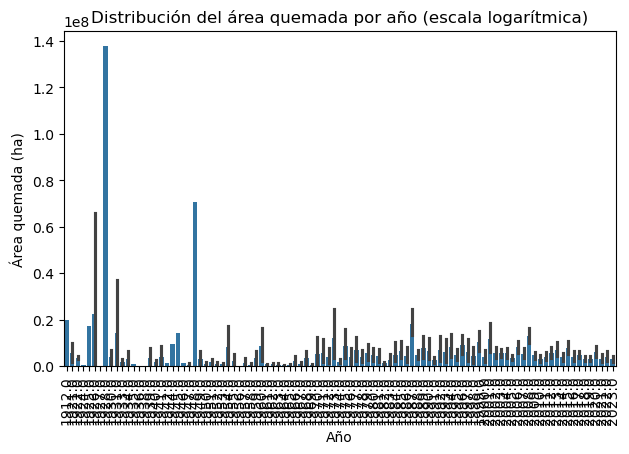

In [25]:
# Asegúrate de que las fechas están en formato datetime
incendios["ALARM_DATE"] = pd.to_datetime(incendios["ALARM_DATE"])
incendios["CONT_DATE"] = pd.to_datetime(incendios["CONT_DATE"])

# Calcular la duración del incendio en días
incendios["Duracion"] = (incendios["CONT_DATE"] - incendios["ALARM_DATE"]).dt.days

# Filtrar los datos para eliminar valores extremos
incendios_filtrado = incendios[
    (incendios["Duracion"] >= 0) &  # Eliminar duraciones negativas
    (incendios["Shape__Area"] <= incendios["Shape__Area"].quantile(0.99))  # Eliminar áreas demasiado grandes (percentil 99)
]

# Crear el boxplot
sns.barplot(data=incendios_filtrado, x="YEAR_", y="Shape__Area")

# Configurar el gráfico
#plt.yscale("log")  # Aplicar escala logarítmica al eje y
plt.title("Distribución del área quemada por año (escala logarítmica)")
plt.xlabel("Año")
plt.ylabel("Área quemada (ha)")
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si hay muchos años
plt.tight_layout()
plt.show()

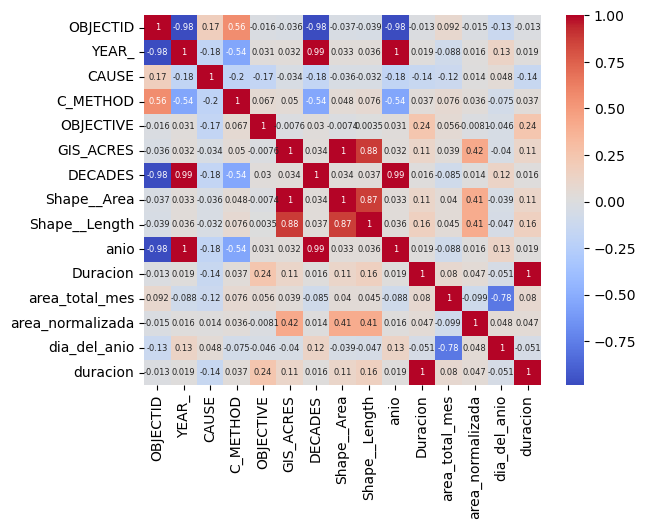

In [44]:
# Revisión de la corralación entre variables
numeric_df = incendios.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.show()

mes_incendio
01    3.741319e+08
02    3.001143e+08
03    3.959705e+08
04    6.870664e+08
05    3.563068e+09
06    2.128618e+10
07    6.215122e+10
08    7.258968e+10
09    3.943202e+10
10    1.953541e+10
11    6.084850e+09
12    3.154652e+09
Name: area_total_mes, dtype: float64


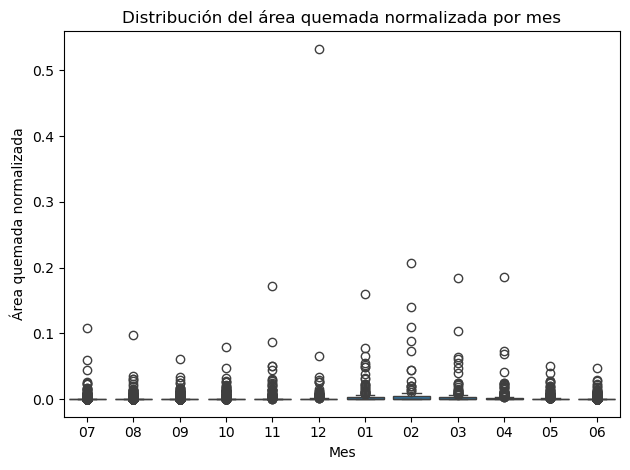

In [27]:
# Asegurarse de que las fechas están en formato datetime
incendios["ALARM_DATE"] = pd.to_datetime(incendios["ALARM_DATE"])

# Extraer el mes del incendio
incendios["mes_incendio"] = incendios["ALARM_DATE"].dt.strftime("%m")

# Calcular el área total quemada por mes
area_total_por_mes = incendios.groupby("mes_incendio")["Shape__Area"].sum().rename("area_total_mes")
print(area_total_por_mes)

# Unir el área total quemada por mes al DataFrame original
incendios = incendios.merge(area_total_por_mes, on="mes_incendio")

# Normalizar el área quemada por el área total del mes
incendios["area_normalizada"] = incendios["Shape__Area"] / incendios["area_total_mes"]

# Crear el boxplot
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']
sns.boxplot(data=incendios, x="mes_incendio", y="area_normalizada", order=orden_meses)

# Configurar el gráfico
plt.title("Distribución del área quemada normalizada por mes")
plt.xlabel("Mes")
plt.ylabel("Área quemada normalizada")
plt.tight_layout()
plt.show()

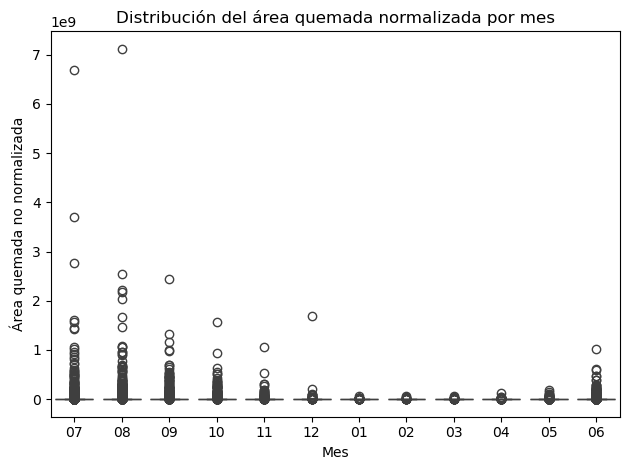

In [28]:
# Crear el boxplot
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']
sns.boxplot(data=incendios, x="mes_incendio", y="Shape__Area", order=orden_meses)

# Configurar el gráfico
plt.title("Distribución del área quemada normalizada por mes")
plt.xlabel("Mes")
plt.ylabel("Área quemada no normalizada")
plt.tight_layout()
plt.show()

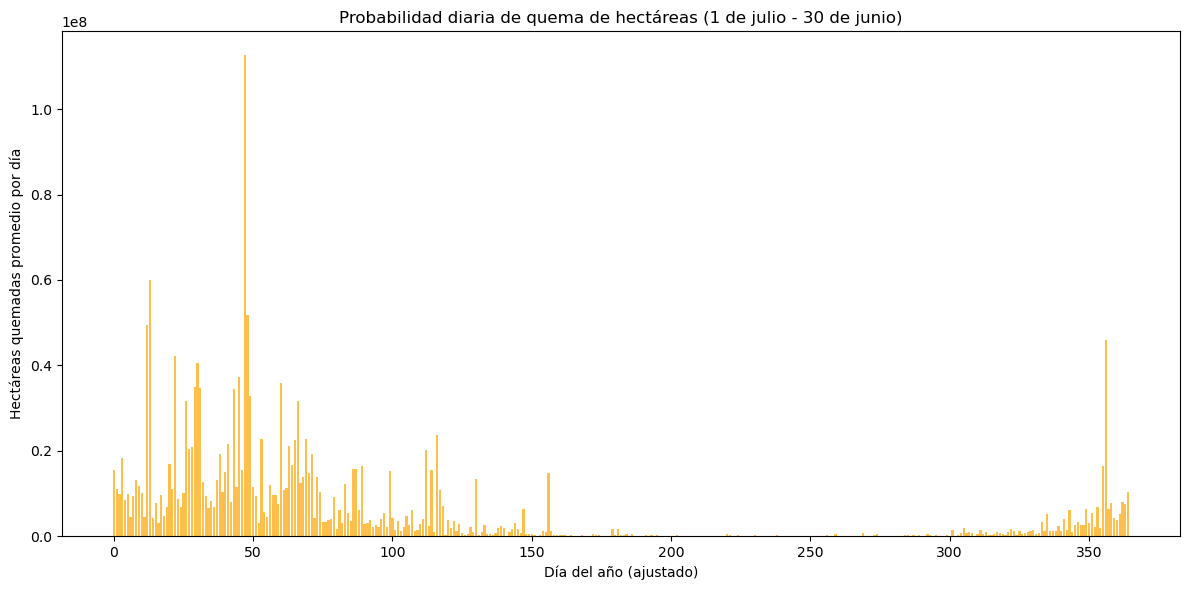

In [33]:
# Asegurarse de que las fechas están en formato datetime
incendios["ALARM_DATE"] = pd.to_datetime(incendios["ALARM_DATE"])

# Cambiar el formato de la fecha a YYYY/MM/DD
incendios["ALARM_DATE"] = incendios["ALARM_DATE"].dt.strftime("%Y/%m/%d")

# Crear una columna con el día del año (ajustado para que el año comience el 1 de julio)
incendios["dia_del_anio"] = (
    pd.to_datetime(incendios["ALARM_DATE"]).dt.dayofyear - 182
) % 365

# Calcular la frecuencia de incendios por día del año y normalizar por el número de años
frecuencia_dias = (
    incendios.groupby("dia_del_anio")["Shape__Area"].sum()
    / pd.to_datetime(incendios["ALARM_DATE"]).dt.year.nunique()
)

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(frecuencia_dias.index, frecuencia_dias.values, color="orange", alpha=0.7)

# Configurar el gráfico
plt.title("Probabilidad diaria de quema de hectáreas (1 de julio - 30 de junio)")
plt.xlabel("Día del año (ajustado)")
plt.ylabel("Hectáreas quemadas promedio por día")
plt.tight_layout()
plt.show()


YEAR_
1898.0    1.300468e+06
1902.0    3.633725e+04
1903.0    1.889578e+04
1907.0    1.183028e+04
1908.0    4.832801e+05
              ...     
2019.0    1.550684e+07
2020.0    2.318870e+08
2021.0    1.441099e+08
2022.0    1.812493e+07
2023.0    1.922960e+07
Name: Shape__Area, Length: 120, dtype: float64


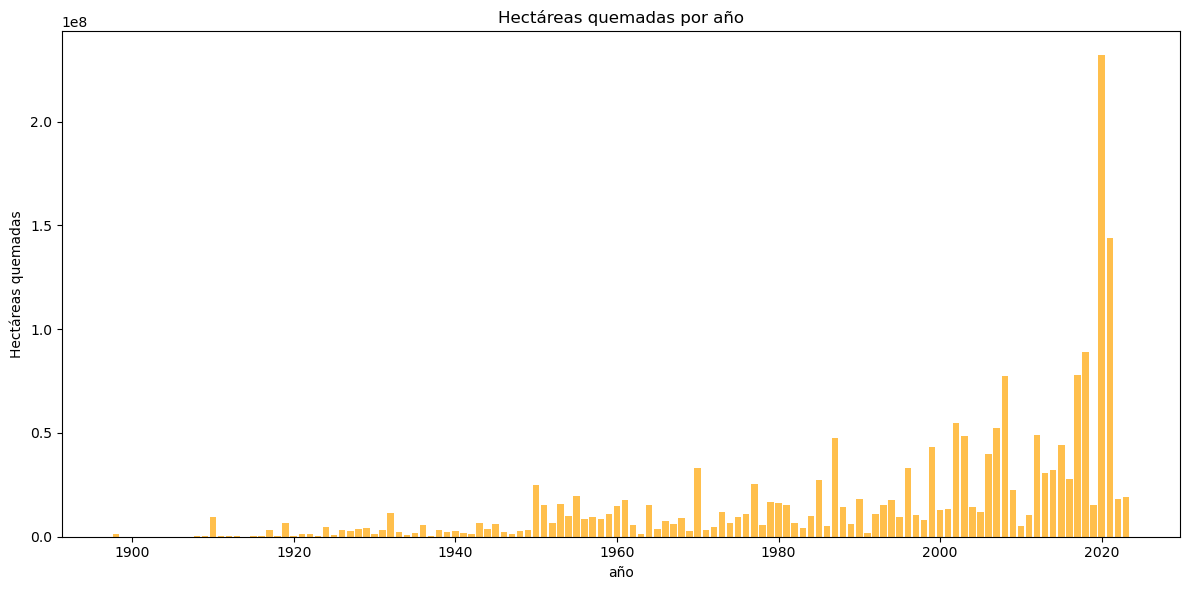

In [35]:
# Calcular la frecuencia de incendios por día del año y normalizar por el número de años
frecuencia_anio = incendios.groupby("YEAR_")["Shape__Area"].sum() / incendios["YEAR_"].nunique()
print(frecuencia_anio)

# Crear el histograma

plt.figure(figsize=(12, 6))
plt.bar(frecuencia_anio.index, frecuencia_anio.values, color="orange", alpha=0.7)

# Configurar el gráfico
plt.title(f"Hectáreas quemadas por año")
plt.xlabel("año")
plt.ylabel("Hectáreas quemadas")
plt.tight_layout()
plt.show()

/tmp/ipykernel_70918/691493432.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cicatrices_incedios_filtrado['categoria'] = None


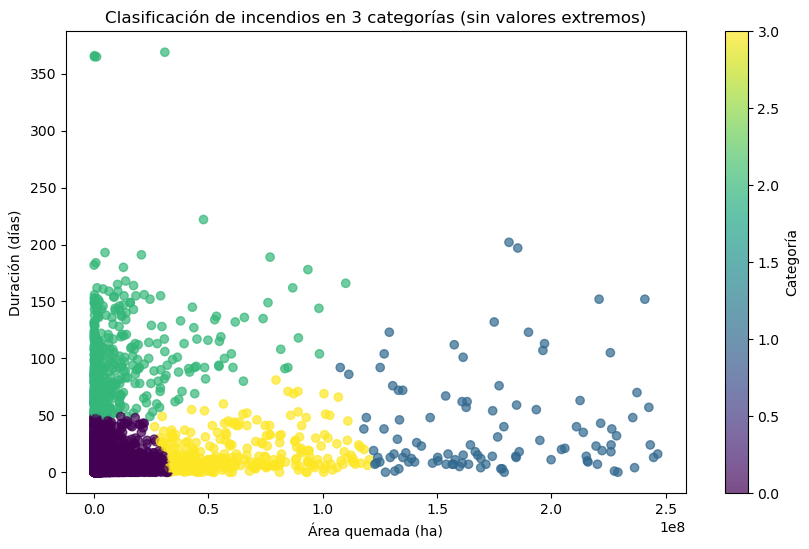

In [43]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asegurarse de que las fechas están en formato datetime
incendios['ALARM_DATE'] = pd.to_datetime(incendios['ALARM_DATE'])
incendios['CONT_DATE'] = pd.to_datetime(incendios['CONT_DATE'])

# Calcular la duración del incendio
# Cambiar el formato de la fecha a YYYY/MM/DD antes de calcular la duración
incendios['ALARM_DATE'] = incendios['ALARM_DATE'].dt.strftime('%Y/%m/%d')
incendios['CONT_DATE'] = incendios['CONT_DATE'].dt.strftime('%Y/%m/%d')

# Convertir nuevamente a datetime para realizar el cálculo
incendios['ALARM_DATE'] = pd.to_datetime(incendios['ALARM_DATE'])
incendios['CONT_DATE'] = pd.to_datetime(incendios['CONT_DATE'])

# Calcular la duración del incendio
incendios['duracion'] = (incendios['CONT_DATE'] - incendios['ALARM_DATE']).dt.days

# Filtrar los datos para eliminar valores extremos
cicatrices_incedios_filtrado = incendios[
    (incendios['duracion'] >= 0) & (incendios['duracion'] <=500) & # Eliminar duraciones negativas
    (incendios['Shape__Area'] <= incendios['Shape__Area'].quantile(0.99))  # Eliminar áreas demasiado grandes (percentil 99)
]

# Seleccionar las columnas relevantes y eliminar valores nulos
features = cicatrices_incedios_filtrado[['Shape__Area', 'duracion']].dropna()

# Escalar los datos para normalizar las magnitudes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar el modelo K-Means con 3 categorías
kmeans = KMeans(n_clusters=4, random_state=42)
features['categoria'] = kmeans.fit_predict(scaled_features)

# Agregar las categorías al DataFrame original
cicatrices_incedios_filtrado['categoria'] = None
cicatrices_incedios_filtrado.loc[features.index, 'categoria'] = features['categoria']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(features['Shape__Area'], features['duracion'], c=features['categoria'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Categoría')
plt.title('Clasificación de incendios en 3 categorías (sin valores extremos)')
plt.xlabel('Área quemada (ha)')
plt.ylabel('Duración (días)')
plt.show()